In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [11]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("data/fcc-forum-pageviews.csv")

In [12]:
# Clean data

# filter out days where post views is less than the 2.5th percentile
df = df[(df['value'] > df['value'].quantile(0.025))]

# filter out days where post views is more than the 97.5th percentile
df = df[(df['value'] < df['value'].quantile(0.975))]

In [13]:
def draw_line_plot():
    # Draw line plot
    plt.figure(figsize=(20, 7))
    fig = plt.plot(df.date, df.value)
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")

    date_ticks = []
    start_date = datetime.date(2016, 7, 1)
    for i in range(8):
        date_ticks.append(str(start_date + relativedelta(months=6*i)))

    plt.xticks(date_ticks)
    # Save image and return fig (don't change this part)
    # fig.savefig('line_plot.png')
    # return fig

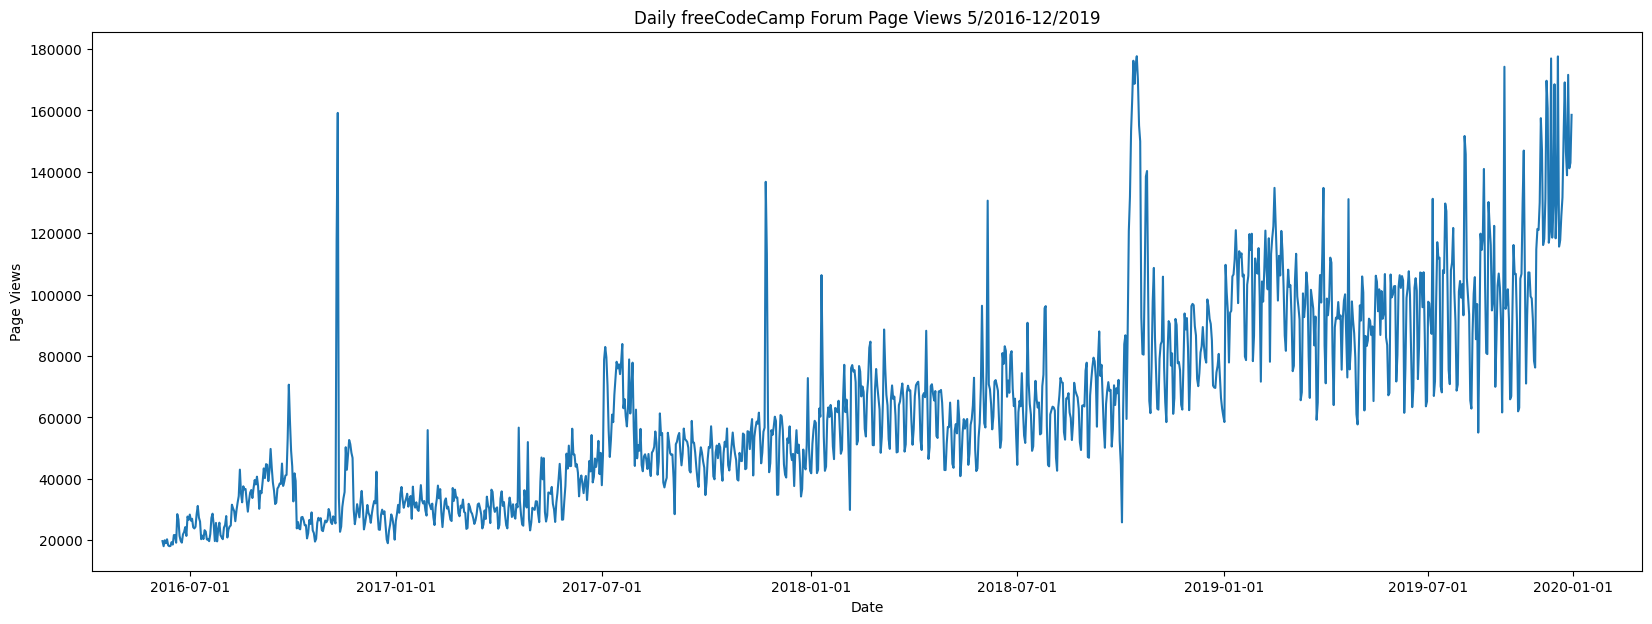

In [14]:
# TESTING ONLY
draw_line_plot()

In [15]:
def get_year(date_txt):
    return int(date_txt.split("-")[0])

months = ["January", "February", "March", "April", "May", "June",
             "July", "August", "September", "October", "November", "December"]
def get_month(date_txt):
    month_num = int(date_txt.split("-")[1])
    return months[month_num - 1]

def get_day(date_txt):
    return int(date_txt.split("-")[2])

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["year"] = df_bar["date"].apply(get_year)
    df_bar["month"] = df_bar["date"].apply(get_month)
    df_bar["day"] = df_bar["date"].apply(get_day)

    # Draw bar plot
    df_grp = df_bar.groupby(["year", "month"])["value"].mean().unstack()
    df_grp = df_grp[months]
    fig = df_grp.plot.bar(figsize=(7,7))
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")

    # Save image and return fig (don't change this part)
    # fig.savefig('bar_plot.png')
    # return fig

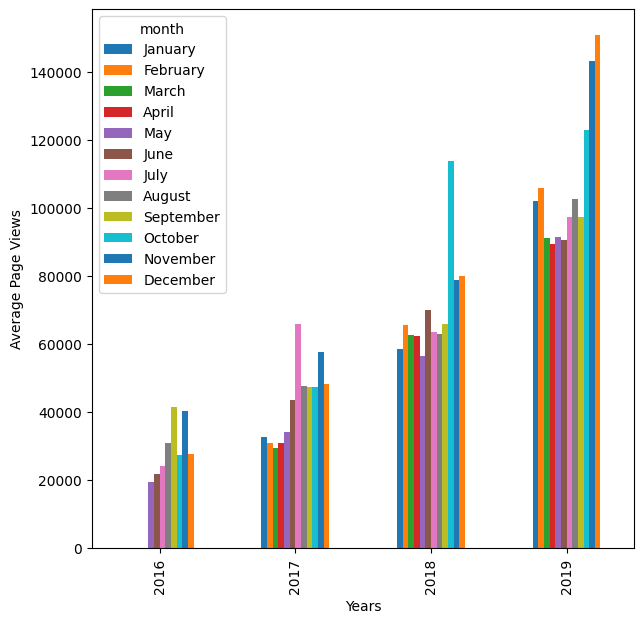

In [16]:
# TESTING ONLY
draw_bar_plot()

In [25]:
def convert_date(date_txt):
    date_parts = date_txt.split("-")
    return datetime.date(int(date_parts[0]), int(date_parts[1]), int(date_parts[2]))

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box.date = df_box.date.apply(convert_date)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    sns.boxplot(ax=axes[0], data=df_box, x="year", y="value", hue="year", legend=False)
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")
    
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    df_box['month'] = pd.Categorical(df_box['month'], categories=months, ordered=True)
    sns.boxplot(ax=axes[1], data=df_box, x="month", y="value", hue="month")
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    # fig.savefig('box_plot.png')
    # return fig

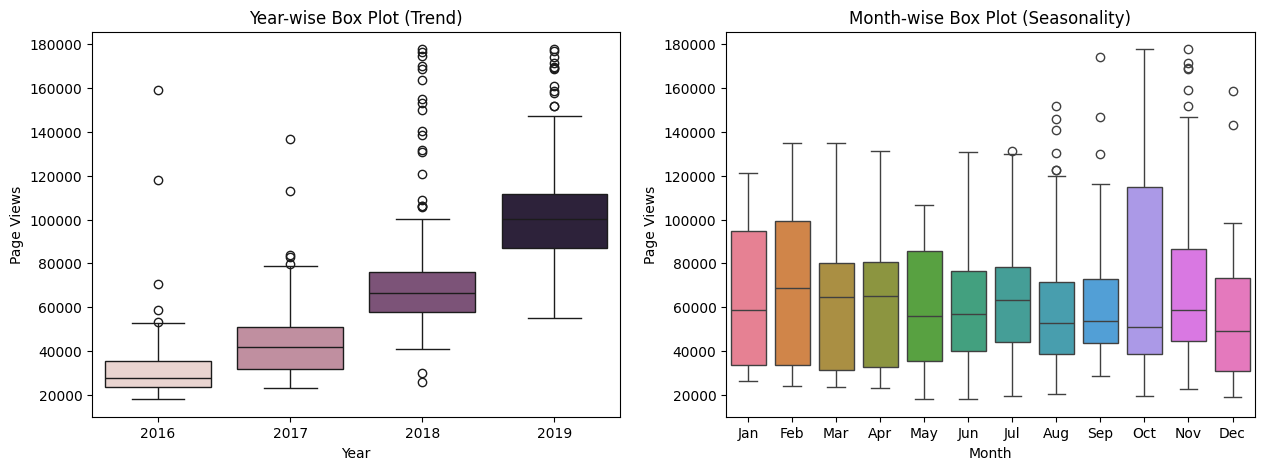

In [26]:
draw_box_plot()